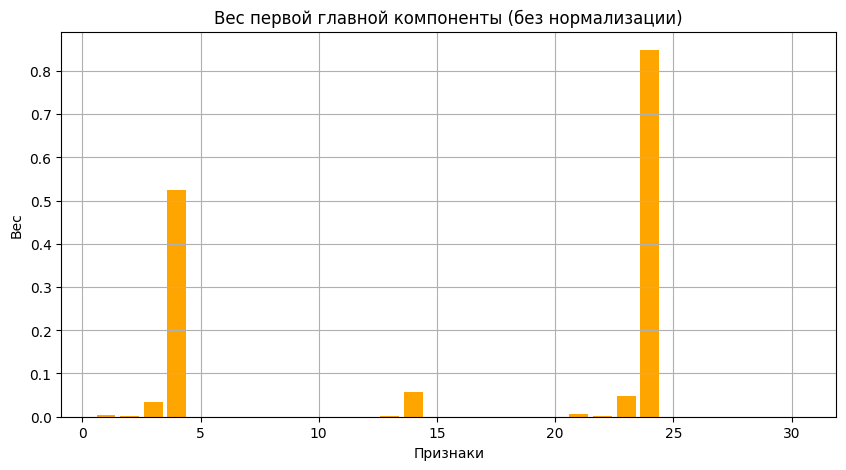

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


data = load_breast_cancer()
X, y = data.data, data.target
features = data.feature_names


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


pca_raw = PCA()
pca_raw.fit(X_train)

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca_raw.components_)+1), np.abs(pca_raw.components_[0]), color='orange')
plt.title('Вес первой главной компоненты (без нормализации)')
plt.xlabel('Признаки')
plt.ylabel('Вес')
plt.grid()
plt.show()

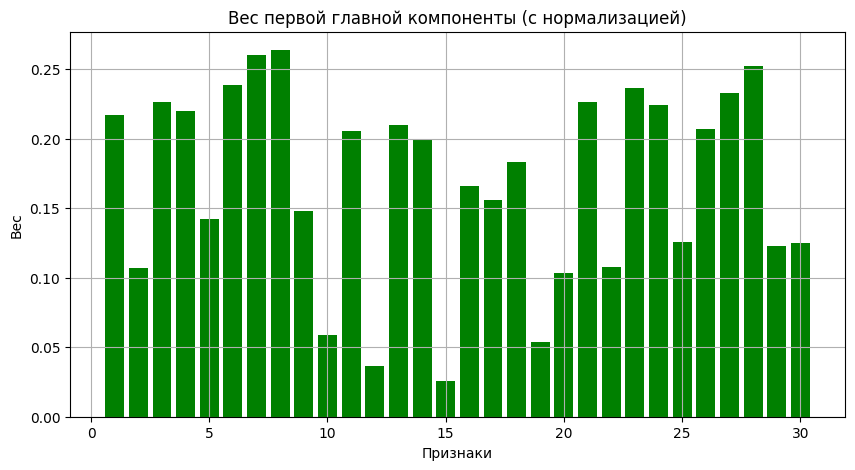

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca_scaled = PCA()
pca_scaled.fit(X_train_scaled)

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca_scaled.components_)+1), np.abs(pca_scaled.components_[0]), color='green')
plt.title('Вес первой главной компоненты (с нормализацией)')
plt.xlabel('Признаки')
plt.ylabel('Вес')
plt.grid()
plt.show()


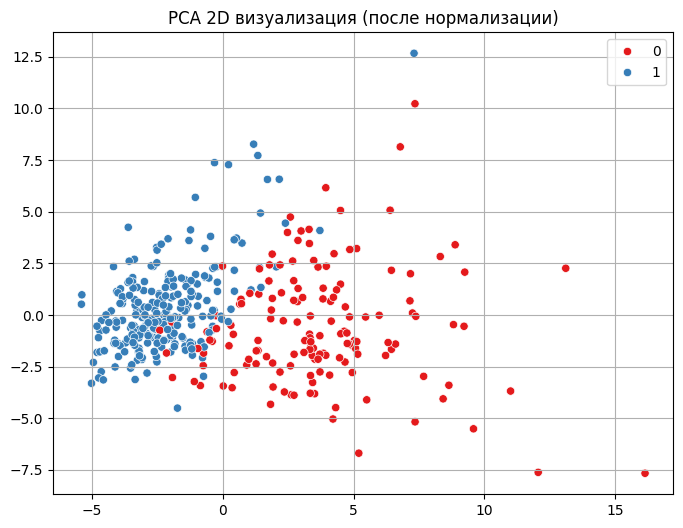

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y_train, palette='Set1', edgecolor='w')
plt.title('PCA 2D визуализация (после нормализации)')
plt.grid()
plt.show()

In [ ]:
start = time.time()
model_raw = SVC()
model_raw.fit(X_train_scaled, y_train)
y_pred_raw = model_raw.predict(X_test_scaled)
time_raw = time.time() - start
acc_raw = accuracy_score(y_test, y_pred_raw)

print(f"SVM без PCA: Accuracy = {acc_raw:.4f}, Время обучения = {time_raw:.4f} сек")

pca_90 = PCA(n_components=0.90)
X_train_pca = pca_90.fit_transform(X_train_scaled)
X_test_pca = pca_90.transform(X_test_scaled)

print(f"Количество компонент для 90% дисперсии: {pca_90.n_components_}")

start = time.time()
model_pca = SVC()
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
time_pca = time.time() - start
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"SVM с PCA (90%): Accuracy = {acc_pca:.4f}, Время обучения = {time_pca:.4f} сек")

SVM без PCA: Accuracy = 0.9766, Время обучения = 0.0203 сек
Количество компонент для 90% дисперсии: 7
SVM с PCA (90%): Accuracy = 0.9766, Время обучения = 0.0085 сек
